In [1]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ejblocks = gpd.read_file("../data/joins/ejblocks.shp.zip")

## MANOVA

In [3]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('AC_5 + AC_10 + AC_15 + AC_20 + AC_30 + AC_45 + AC_60 ~ TC', data=ejblocks)
print(fit.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9915 7.0000 47130.0000 57.4314 0.0000
         Pillai's trace 0.0085 7.0000 47130.0000 57.4314 0.0000
 Hotelling-Lawley trace 0.0085 7.0000 47130.0000 57.4314 0.0000
    Roy's greatest root 0.0085 7.0000 47130.0000 57.4314 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
           TC           Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9987 7.0000 47130.0000  8.9872 0.0000
         Pillai's trace 0.0013 7.0000 47130.0000  8.9872 0.

## Creating Boolean Columns

In [4]:
cols = ["AC_5","AC_10","AC_15","AC_20","AC_30","AC_45","AC_60"]
cols_bools = [col+"_bool" for col in cols]

In [5]:
ejblocks["TC_bool"] = ejblocks["TC"] > 0
for i in range(len(cols)):
    if i == 0:
        ejblocks[cols_bools[i]] = ejblocks[cols[i]] == 0
    else:
        ejblocks[cols_bools[i]] = (ejblocks[cols[i]] == 0) & ejblocks[cols_bools[i-1]]

In [6]:
ejblocks[cols_bools].head(10)

,AC_5_bool,AC_10_bool,AC_15_bool,AC_20_bool,AC_30_bool,AC_45_bool,AC_60_bool
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
5,True,True,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


## 10-Minute Walk Analysis

In [7]:
tab = pd.crosstab(ejblocks["TC_bool"], ejblocks["AC_10_bool"], ejblocks["P1_001N"], aggfunc='sum')
table = sm.stats.Table2x2(tab)

print("Total Values:", int(np.sum(tab.values)))
print(table.table_orig)
print(table.summary())
print(table.test_nominal_association())
print("Probability of No Conserved Land w/in 10-Minute Walk:", table.marginal_probabilities[1])

Total Values: 1362359
AC_10_bool     False     True 
AC_10_bool                    
False       300060.0  690013.0
True         90240.0  282046.0
               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.359       1.347 1.371   0.000
Log odds ratio    0.307 0.004 0.298 0.316   0.000
Risk ratio        1.250       1.242 1.258   0.000
Log risk ratio    0.223 0.003 0.217 0.230   0.000
-------------------------------------------------
df          1
pvalue      0.0
statistic   4872.518286037001
Probability of No Conserved Land w/in 10-Minute Walk: AC_10_bool
False    0.286488
True     0.713512
dtype: float64


(-7936394.985439143, -7422284.928615487, 5263461.463094186, 6053360.48906883)

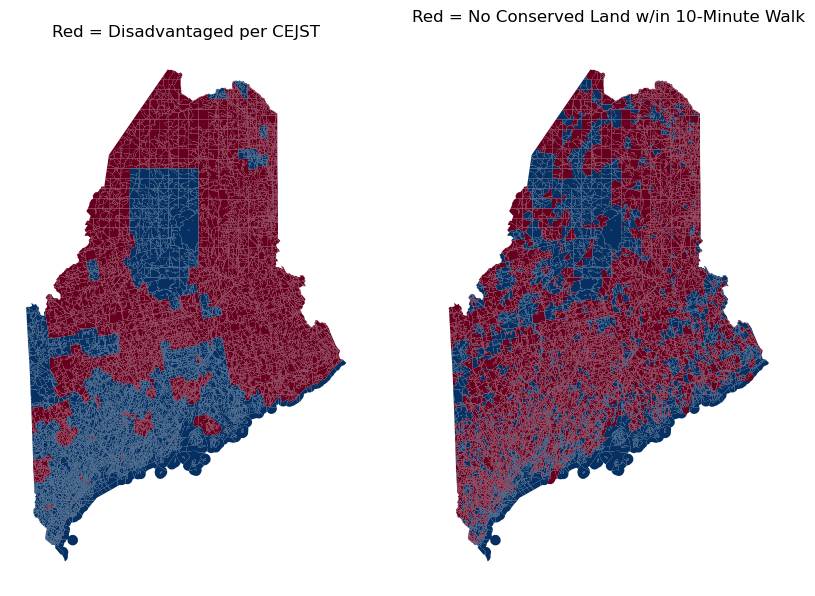

In [8]:
fig, axs = plt.subplots(1,2, figsize=(10,8))
ejblocks.plot("TC_bool", cmap="RdBu_r", ax=axs[0])
ejblocks.plot("AC_10_bool", cmap="RdBu_r", ax=axs[1])
axs[0].set_title("Red = Disadvantaged per CEJST")
axs[1].set_title("Red = No Conserved Land w/in 10-Minute Walk")
axs[0].axis("off")
axs[1].axis("off")

## 60-Minute Walk Analysis

In [9]:
tab = pd.crosstab(ejblocks["TC_bool"], ejblocks["AC_60_bool"], ejblocks["P1_001N"], aggfunc='sum')
table = sm.stats.Table2x2(tab)

print("Total Values:", int(np.sum(tab.values)))
print(table.table_orig)
print(table.summary())
print(table.test_nominal_association())
print(*table.marginal_probabilities)
print("Probability of No Conserved Land w/in 60-Minute Walk:", table.marginal_probabilities[1])

Total Values: 1362359
AC_60_bool     False    True 
AC_60_bool                   
False       899027.0  91046.0
True        279274.0  93012.0
               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        3.289       3.256 3.322   0.000
Log odds ratio    1.190 0.005 1.180 1.201   0.000
Risk ratio        1.210       1.208 1.213   0.000
Log risk ratio    0.191 0.001 0.189 0.193   0.000
-------------------------------------------------
df          1
pvalue      0.0
statistic   57714.63246703675
AC_60_bool
False    0.726734
True     0.273266
dtype: float64 AC_60_bool
False    0.864898
True     0.135102
dtype: float64
Probability of No Conserved Land w/in 60-Minute Walk: AC_60_bool
False    0.864898
True     0.135102
dtype: float64


(-7936394.985439143, -7422284.928615487, 5263461.463094186, 6053360.48906883)

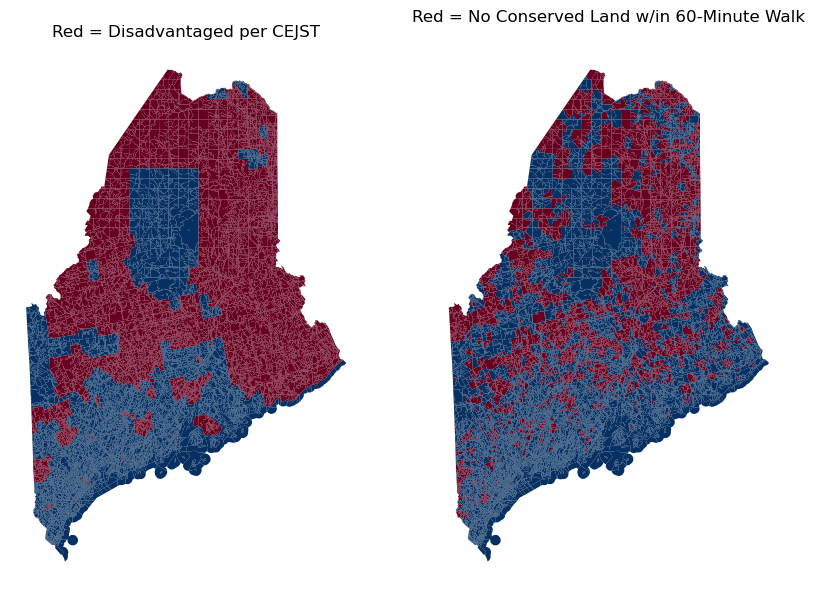

In [10]:
fig, axs = plt.subplots(1,2, figsize=(10,8))
ejblocks.plot("TC_bool", cmap="RdBu_r", ax=axs[0])
ejblocks.plot("AC_60_bool", cmap="RdBu_r", ax=axs[1])
axs[0].set_title("Red = Disadvantaged per CEJST")
axs[1].set_title("Red = No Conserved Land w/in 60-Minute Walk")
axs[0].axis("off")
axs[1].axis("off")

## Checking Population and Population Density Effects

In [11]:
fit = MANOVA.from_formula('AC_10 + AC_60 ~ TC + P1_001N + POPDENSE + TC*POPDENSE + TC*P1_001N', data=ejblocks)
print(fit.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.9954 2.0000 43174.0000 100.7740 0.0000
         Pillai's trace 0.0046 2.0000 43174.0000 100.7740 0.0000
 Hotelling-Lawley trace 0.0047 2.0000 43174.0000 100.7740 0.0000
    Roy's greatest root 0.0047 2.0000 43174.0000 100.7740 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            TC           Value  Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9994 2.0000 43174.0000 13.2724 0.0000
          Pillai's trace 0.0006 2.0000 43174.

## Plots

In [12]:
percents = ejblocks.groupby("TC_bool")[cols_bools].sum() / ejblocks.groupby("TC_bool")[cols_bools].count()
percents = percents.melt(ignore_index=False).reset_index()
percents

,TC_bool,variable,value
0,False,AC_5_bool,0.756114
1,True,AC_5_bool,0.801810
2,False,AC_10_bool,0.634228
3,True,AC_10_bool,0.741514
4,False,AC_15_bool,0.533596
5,True,AC_15_bool,0.691590
6,False,AC_20_bool,0.448353
7,True,AC_20_bool,0.646379
8,False,AC_30_bool,0.315321
9,True,AC_30_bool,0.563408


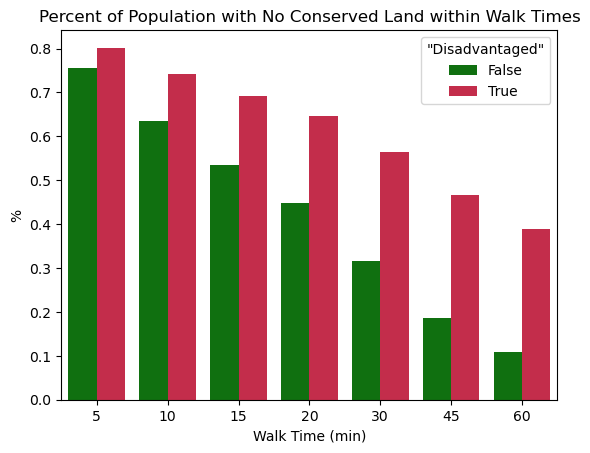

In [13]:
ax = sns.barplot(
    percents,
    x="variable",
    y="value",
    hue="TC_bool",
    errorbar=None,
    palette={True:"crimson",False:"green"}
    )
ax.set_title("Percent of Population with No Conserved Land within Walk Times")
ax.set_ylabel("%")
ax.set_xlabel("Walk Time (min)")
ax.set_xticklabels([label.get_text().split("_")[1] for label in ax.get_xticklabels()])
ax.legend(title="\"Disadvantaged\"")